In [2]:
data<-read.csv("/home/iiitb/DataAnalyticsProject/Data/big_student_clear_third_version.csv", header=TRUE)

In [8]:
head(data)

X,institute,course_id,year,semester,userid_DI,viewed,explored,certified,final_cc_cname_DI,⋯,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
4,HarvardX,PH207x,2012,Fall,MHxPC130313697,0,0,0,India,⋯,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
6,HarvardX,PH207x,2012,Fall,MHxPC130237753,1,0,0,United States,⋯,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
7,HarvardX,CS50x,2012,Summer,MHxPC130202970,1,0,0,United States,⋯,0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
20,HarvardX,CS50x,2012,Summer,MHxPC130223941,1,0,0,Other Middle East/Central Asia,⋯,0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
22,HarvardX,PH207x,2012,Fall,MHxPC130317399,0,0,0,Australia,⋯,0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32
23,HarvardX,CS50x,2012,Summer,MHxPC130191782,1,0,0,Pakistan,⋯,0,2012-07-24,2013-05-05,2,2,197757,1,0,0,22


In [4]:
class(data$certified)

[1] "integer"

In [5]:
data['certified']<-as.factor(data$certified)

In [6]:
class(data$certified)

[1] "factor"

In [7]:
library(dplyr)
library(rpart)
library(ggplot2)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [10]:
names(data)

[1] "X"                 "institute"         "course_id"        
 [4] "year"              "semester"          "userid_DI"        
 [7] "viewed"            "explored"          "certified"        
[10] "final_cc_cname_DI" "LoE_DI"            "gender"           
[13] "grade"             "start_time_DI"     "last_event_DI"    
[16] "nevents"           "ndays_act"         "nplay_video"      
[19] "nchapters"         "nforum_posts"      "incomplete_flag"  
[22] "age"

In [11]:
data_filtered<-select(data,institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,
                      grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag
                     ,age)

In [12]:
head(data_filtered)

institute,course_id,semester,viewed,explored,certified,final_cc_cname_DI,LoE_DI,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,age
HarvardX,PH207x,Fall,0,0,0,India,Bachelor's,m,0,2012-07-24,2013-07-27,6,3,197757,0,0,0,23
HarvardX,PH207x,Fall,1,0,0,United States,Secondary,m,0,2012-07-24,2012-12-24,107,8,7,2,0,0,19
HarvardX,CS50x,Summer,1,0,0,United States,Bachelor's,m,0,2012-07-24,2013-03-28,8,1,197757,1,0,0,24
HarvardX,CS50x,Summer,1,0,0,Other Middle East/Central Asia,Secondary,m,0,2012-07-24,2013-07-15,25,2,197757,4,0,0,20
HarvardX,PH207x,Fall,0,0,0,Australia,Master's,f,0,2012-07-24,2012-08-25,3,2,197757,0,0,0,32
HarvardX,CS50x,Summer,1,0,0,Pakistan,Bachelor's,m,0,2012-07-24,2013-05-05,2,2,197757,1,0,0,22


In [41]:
set.seed(101) 
# Now Selecting 70% of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(data_filtered), size = floor(.70*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

In [42]:
nrow(train)
nrow(test)

[1] 291844

[1] 125077

In [43]:
table(data_filtered$certified)/nrow(data_filtered)

table(train$certified)/nrow(train)

table(test$certified)/nrow(test)


        0         1 
0.9642882 0.0357118 


         0          1 
0.96419663 0.03580337 


         0          1 
0.96450187 0.03549813 

In [18]:
attach(data_filtered)
dtfit<-rpart(certified~institute+course_id+semester+viewed+explored+final_cc_cname_DI+LoE_DI+gender+
                      grade+start_time_DI+last_event_DI+nevents+ndays_act+nplay_video+nchapters+nforum_posts+incomplete_flag
                     +age,data = train, method="class")
dtfit

The following objects are masked from data_filtered (pos = 3):

    age, certified, course_id, explored, final_cc_cname_DI, gender,
    grade, incomplete_flag, institute, last_event_DI, LoE_DI,
    nchapters, ndays_act, nevents, nforum_posts, nplay_video, semester,
    start_time_DI, viewed



n= 291844 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 291844 10449 0 (0.964196626 0.035803374)  
  2) grade< 0.545 281130   177 0 (0.999370398 0.000629602) *
  3) grade>=0.545 10714   442 1 (0.041254433 0.958745567) *

In [21]:
install.packages('rattle')
install.packages('rpart.plot')
install.packages('RColorBrewer')
library(rattle)
library(rpart.plot)
library(RColorBrewer)

also installing the dependencies ‘RGtk2’, ‘cairoDevice’, ‘XML’, ‘rpart.plot’

Warning message in install.packages("rattle"):
“installation of package ‘RGtk2’ had non-zero exit status”Warning message in install.packages("rattle"):
“installation of package ‘cairoDevice’ had non-zero exit status”Warning message in install.packages("rattle"):
“installation of package ‘rattle’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(rattle): there is no package called ‘rattle’


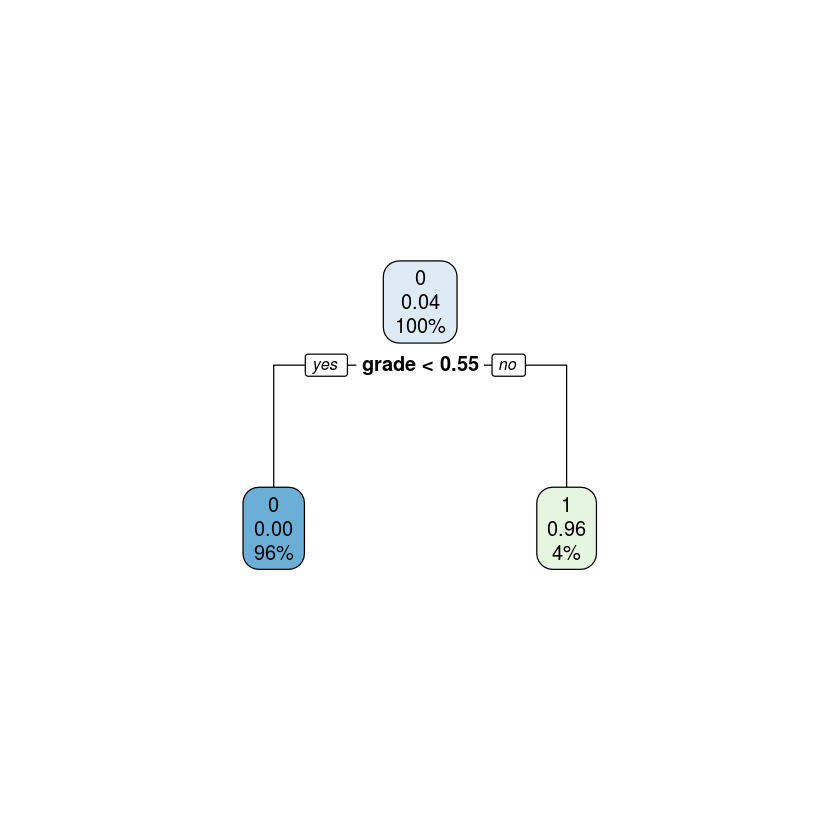

In [25]:
library(rpart.plot)
library(RColorBrewer)
rpart.plot(dtfit)

In [27]:
summary(dtfit)

Call:
rpart(formula = certified ~ institute + course_id + semester + 
    viewed + explored + final_cc_cname_DI + LoE_DI + gender + 
    grade + start_time_DI + last_event_DI + nevents + ndays_act + 
    nplay_video + nchapters + nforum_posts + incomplete_flag + 
    age, data = train, method = "class")
  n= 291844 

         CP nsplit  rel error     xerror        xstd
1 0.9407599      0 1.00000000 1.00000000 0.009606063
2 0.0100000      1 0.05924012 0.05924012 0.002378535

Variable importance
    grade ndays_act   nevents nchapters 
       50        18        17        15 

Node number 1: 291844 observations,    complexity param=0.9407599
  predicted class=0  expected loss=0.03580337  P(node) =1
    class counts: 281395 10449
   probabilities: 0.964 0.036 
  left son=2 (281130 obs) right son=3 (10714 obs)
  Primary splits:
      grade     < 0.545  to the left,  improve=18948.470, (0 missing)
      ndays_act < 27.5   to the left,  improve= 8542.374, (0 missing)
      nchapters < 10.5  

In [60]:
predicted<-predict(dtfit,test,type="class")

In [61]:
predicted

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [45]:
summary(test)

       X             institute       course_id          year     
 Min.   :    20   HarvardX:52901   6.00x  :31494   Min.   :2012  
 1st Qu.:237176   MITx    :72176   6.002x :14069   1st Qu.:2012  
 Median :353616                    CS50x  :13957   Median :2013  
 Mean   :340734                    ER22x  :12104   Mean   :2013  
 3rd Qu.:466334                    PH207x :10964   3rd Qu.:2013  
 Max.   :583004                    CB22x  : 8326   Max.   :2013  
                                   (Other):34163                 
   semester              userid_DI          viewed          explored      
 Fall  :45845   MHxPC130165828:    11   Min.   :0.0000   Min.   :0.00000  
 Spring:73210   MHxPC130027283:     7   1st Qu.:0.0000   1st Qu.:0.00000  
 Summer: 6022   MHxPC130045546:     7   Median :1.0000   Median :0.00000  
                MHxPC130414295:     7   Mean   :0.7105   Mean   :0.07777  
                MHxPC130595319:     7   3rd Qu.:1.0000   3rd Qu.:0.00000  
                MHxPC1

In [62]:
library(caret)
print(confusionMatrix(data=predicted, reference=test$certified,positive='1'))

Warning message in ni[1:m] * nj[1:m]:
“NAs produced by integer overflow”

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 120438     77
         1    199   4363
                                         
               Accuracy : 0.9978         
                 95% CI : (0.9975, 0.998)
    No Information Rate : 0.9645         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : NA             
 Mcnemar's Test P-Value : 3.256e-13      
                                         
            Sensitivity : 0.98266        
            Specificity : 0.99835        
         Pos Pred Value : 0.95638        
         Neg Pred Value : 0.99936        
             Prevalence : 0.03550        
         Detection Rate : 0.03488        
   Detection Prevalence : 0.03647        
      Balanced Accuracy : 0.99050        
                                         
       'Positive' Class : 1              
                                         


In [48]:
table(test$certified)


     0      1 
120637   4440 